In [4]:
from controller import Imager
import time
import cv2
import polanalyser as pa
from PIL import Image
import matplotlib.pyplot as plt
from mpldatacursor import datacursor
import numpy as np
import os
import scipy.io as si

In [ ]:

image = np.array(cv2.imread(r'C:\Users\masadatz\Google Drive\CloudCT\svs_vistek\Data_From_Experiment\B\B23_30000\8\25_16_58_59_495704_101935.png'))
img = image[...,0]
print(image.shape)
img_demosaiced = pa.demosaicing(img)
img_0, img_45, img_90, img_135 = cv2.split(img_demosaiced)
Stokes =  pa.calcLinearStokes(np.moveaxis(np.array([img_0, img_45, img_90, img_135]), 0, -1),
                              np.deg2rad([0,45,90,135]))
I = Stokes[:, :, 0]
DoLP = pa.cvtStokesToDoLP(Stokes)
AoLP = (180/np.pi)*pa.cvtStokesToAoLP(Stokes)-90

plt.imshow(DoLP, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
cbar = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=plt.get_cmap('gray')))
plt.show()

In [ ]:
mean = np.mean(DoLP[600:1000,:],0)
plt.plot(mean)
plt.show()

In [ ]:
image = np.array(cv2.imread(r'C:\Users\masadatz\Google Drive\CloudCT\svs_vistek\Data_From_Experiment\B\B23_30000\8\25_16_58_59_798944_192900073.png'))

img1 = image[...,0]
img_demosaiced1 = pa.demosaicing(img1)
img_0, img_45, img_90, img_135 = cv2.split(img_demosaiced1)
Stokes1 =  pa.calcLinearStokes(np.moveaxis(np.array([img_0, img_45, img_90, img_135]), 0, -1),
                              np.deg2rad([0,45,90,135]))
I1 = Stokes1[:, :, 0]
DoLP1 = pa.cvtStokesToDoLP(Stokes1)
AoLP1 = (180/np.pi)*pa.cvtStokesToAoLP(Stokes1)-90

plt.imshow(DoLP1, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
cbar1 = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=plt.get_cmap('gray')))
plt.show()

img2 = image[...,1]
img_demosaiced2 = pa.demosaicing(img2)
img_0, img_45, img_90, img_135 = cv2.split(img_demosaiced2)
Stokes2 =  pa.calcLinearStokes(np.moveaxis(np.array([img_0, img_45, img_90, img_135]), 0, -1),
                              np.deg2rad([0,45,90,135]))
I2 = Stokes2[:, :, 0]
DoLP2 = pa.cvtStokesToDoLP(Stokes2)
AoLP2 = (180/np.pi)*pa.cvtStokesToAoLP(Stokes2)-90

plt.imshow(DoLP2, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
cbar2 = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=plt.get_cmap('gray')))
plt.show()

img3 = image[...,2]
img_demosaiced3 = pa.demosaicing(img3)
img_0, img_45, img_90, img_135 = cv2.split(img_demosaiced3)
Stokes3 =  pa.calcLinearStokes(np.moveaxis(np.array([img_0, img_45, img_90, img_135]), 0, -1),
                              np.deg2rad([0,45,90,135]))
I3 = Stokes3[:, :, 0]
DoLP3 = pa.cvtStokesToDoLP(Stokes3)
AoLP3 = (180/np.pi)*pa.cvtStokesToAoLP(Stokes3)-90

plt.imshow(DoLP3, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
cbar3 = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=plt.get_cmap('gray')))
plt.show()


In [ ]:
mean1 = np.mean(DoLP1[600:1000,:],0)
plt.plot(mean1, 'b')
mean2 = np.mean(DoLP2[600:1000,:],0)
plt.plot(mean2, 'g')
mean3 = np.mean(DoLP3[600:1000,:],0)
plt.plot(mean3, 'r')
plt.show()

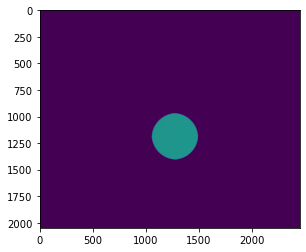

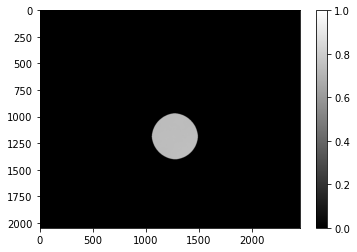

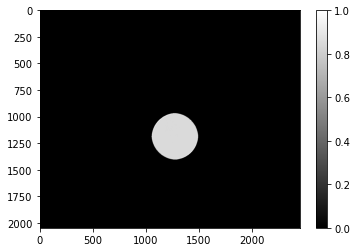

0.024915138325278353
0.02120894125507189
(1153, 1071, 253, 250)


(0.0, 1.0)

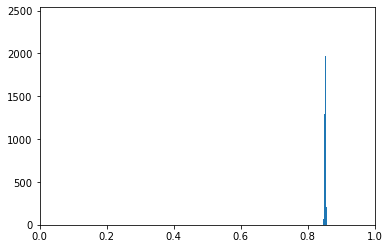

In [11]:
image = np.load(r'C:\Users\masadatz\Google Drive\CloudCT\svs_vistek\calibration\101934\patch\rad_fixed\fixed_polcal_patch_0_101934.npy')
#image = np.squeeze(np.array(init_image[0]))
#image = np.load(r'C:\Users\masadatz\Google Drive\CloudCT\svs_vistek\Data_From_Experiment\A\A32_45000\12\25_15_37_37_160053_101935.npy')
img_demosaiced = pa.demosaicing(image)
img_0, img_45, img_90, img_135 = cv2.split(img_demosaiced)
Stokes =  pa.calcLinearStokes(np.moveaxis(np.array([img_0, img_45, img_90, img_135]), 0, -1),
                              np.deg2rad([0,45,90,135]))

plt.imshow(image)
plt.show()
I = Stokes[:, :, 0]
DoLP = pa.cvtStokesToDoLP(Stokes)
DoLP[I<20] = 0
AoLP = (180/np.pi)*pa.cvtStokesToAoLP(Stokes)-90

plt.imshow(img_0, cmap=plt.get_cmap('gray'), vmin=0, vmax=4096)
cbar = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=plt.get_cmap('gray')))
#plt.imshow(DoLP)
plt.show()
plt.imshow(DoLP, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
cbar2 = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=plt.get_cmap('gray')))
plt.show()
print(np.nanmean(DoLP))
print(np.nanvar(DoLP))

cv2.namedWindow('to crop image', cv2.WINDOW_NORMAL)
r = cv2.selectROI('to crop image', DoLP, False,False)
# crop:
print(r)
imCrop = DoLP[int(r[1]):int(r[1]+r[3]),int(r[0]):int(r[0]+r[2])]
cv2.imshow('Image',imCrop)
cv2.waitKey(0)
plt.hist(imCrop.flatten(),100)
plt.xlim([0,1])


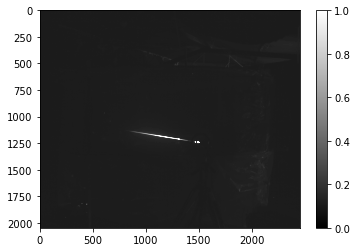

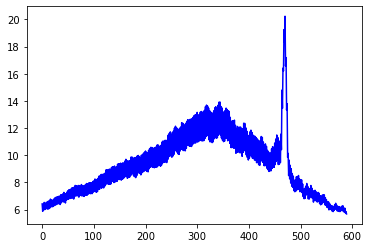

In [37]:
import glob
import copy
exp =r'\A\A32_45000'
dir = r'C:\Users\masadatz\Google Drive\CloudCT\svs_vistek\Data_From_Experiment'
ID = ['101933','101934','101935','101936']
cam = 2
pattern = dir+exp+'\*\*_'+ID[cam]+'.npy'
image_sum = np.zeros([2048,2448])
num = 0
for name in glob.glob(pattern):
    image = np.load(name)
    #image[image<5] = 0
    #image[image>5] = image[image>5]-5
    image_sum = image_sum+ copy.deepcopy(image)
    num = num+1
image_mean = image_sum/num
plt.imshow(image_mean, cmap=plt.get_cmap('gray'), vmin=0, vmax=50)
cbar2 = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=plt.get_cmap('gray')))
np.save(dir+exp+'_'+ID[cam]+'_mean',image_mean)
si.savemat(dir+exp+'_'+ID[cam]+'_mean.mat', {'data': image_mean})

cv2.namedWindow('to crop image', cv2.WINDOW_NORMAL)
r = cv2.selectROI('to crop image', image_mean/100, False,False)

# crop:

imCrop = image_mean[int(r[1]):int(r[1]+r[3]),int(r[0]):int(r[0]+r[2])]
cv2.imshow('Image',imCrop)
cv2.waitKey(0)
plt.figure(2)
mean1 = np.mean(imCrop,0)
plt.plot(mean1, 'b')

plt.show()

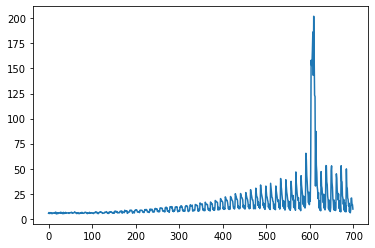

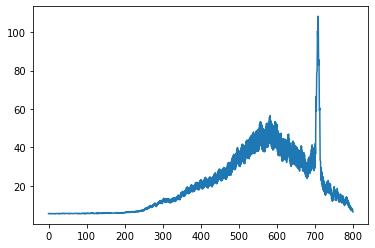

In [45]:
x = np.arange(2448)
y = (np.round(0.173*x +984.2)).astype(int) # y = 0.173*x +984.2 from A32_45000_101935

plt.plot(image_mean[y[700:1400],x[700:1400]])
plt.show()


im_cut= np.zeros(2448)
pix =20
for i in range(pix):
    im_cut = im_cut+ image_mean[y-int(pix/2)+i,x]/pix

plt.plot(im_cut[600:1400])
plt.show()